# Tobig's 16기 3주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.67283132, 0.72333819, 0.38833773])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

In [11]:
dot_product(X_train.iloc[1], parameters)

1.547465596165016

## Logistic Function

## $p = \frac{1}{(1+e^{-x\theta})}$

In [12]:
def logistic(X, parameters):
    z = dot_product(X,parameters) 
    p = 1/(1+np.exp(-z)) 
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.8245473837083176

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## $l(p) = -\Sigma[y_ilogp_i + (1-y_i)log(1-p_i)]$
+) $p_i = \frac{1}{(1+e^{-x\theta})}$

In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = (y-y_hat)*1/2
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

-0.42258188597829444

In [18]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.2098724687527542

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i-\theta^{T}x_i)x_{ij}$ 
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma[(y_i-P_i)x_{ij}]$ 

In [19]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [20]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.11936066563861701

In [21]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.07700087687125563

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [22]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] = get_gradient_ij(X,y,parameters,j,model)
    
    return gradients

In [23]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[0.7924411755363063, 0.4312472456715538, 0.5575542745201951]

## mini-batch
인덱스로 미니 배치 나누기

In [24]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_size에 맞게끔 학습에 들어갈 데이터를 batch 크기 만큼 나눠주는 역할을 함

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [25]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= -learning_rate*1/n
    
    parameters -= gradients
    return parameters

In [26]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.67288415, 0.72336694, 0.3883749 ])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 모델을 학습 시키는 횟수
- num_epoch:  hyperaparmeter로 받는 값
<br>

BGD: batch gradient descent -> 전체 데이터에 대해 업데이트가 한번에 이루어짐
SGD: stochastic gradient descent -> 개별 데이터 한 개에 대해서 error gradeint 계산
MGD: mini-batch gradient descent -> mini-batch안의 데이터 m개에 대해서 각 데이터에 대한 기울기를 m개 구한 뒤, 그것의 평균 기울기를 통해 모델을 업데이트 함
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> sgd  
batch_size=k -> mgd  
batch_size=whole -> bgd  

### 기존 과제 form

In [65]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
                
        if stopper:
            break
            
        
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch,y_batch,parameters,model)
            parameters = step(parameters,gradients,learning_rate,batch_size)
            new_loss = batch_loss(X_batch,y_batch,parameters,loss_function,batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

### 중단 조건 바꾼 form

In [39]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    train_loss_min = np.Inf
    epoch_loss = 0.0
    for epoch in range(num_epoch):
        
        train_loss = 0.0
        
        
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch,y_batch,parameters,model)
            parameters = step(parameters,gradients,learning_rate,batch_size)
            new_loss = batch_loss(X_batch,y_batch,parameters,loss_function,batch_size)

            train_loss += new_loss
        
        train_loss = train_loss * 1/batch_size
        
        if epoch_loss >= train_loss:
            break
        
        epoch_loss = train_loss
        
        if train_loss <= train_loss_min:
            print(f"epoch: {epoch}  loss: {train_loss}  params: {parameters}  gradients: {gradients}")
        
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [40]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.01, num_epoch=1000, tolerance = 0.00001, model = 'logistic',batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 0.006771793730499139  params: [0.45229354 0.04655559 0.98251211]  gradients: [-5.086216425133753e-05, -2.7679238433614866e-05, -3.578614787462194e-05]
epoch: 1  loss: 0.006771975298873439  params: [0.4523444  0.04658327 0.98254789]  gradients: [-5.086326273633355e-05, -2.767983623020037e-05, -3.578692075849514e-05]
epoch: 2  loss: 0.0067721568768438255  params: [0.45239526 0.04661095 0.98258368]  gradients: [-5.0864361192423457e-05, -2.768043401105514e-05, -3.5787693622030256e-05]
epoch: 3  loss: 0.006772338464410203  params: [0.45244613 0.04663863 0.98261947]  gradients: [-5.086545961960245e-05, -2.7681031776176554e-05, -3.578846646522393e-05]
epoch: 4  loss: 0.006772520061572475  params: [0.452497   0.04666631 0.98265526]  gradients: [-5.0866558017865704e-05, -2.7681629525561998e-05, -3.5789239288072754e-05]
epoch: 5  loss: 0.006772701668330564  params: [0.45254786 0.046694   0.98269105]  gradients: [-5.08676563872084e-05, -2.7682227259208848e-05, -3.5790012090573335e

epoch: 50  loss: 0.006780883902647364  params: [0.45483804 0.04794031 0.9843024 ]  gradients: [-5.091705299694362e-05, -2.7709108941473035e-05, -3.582476708785883e-05]
epoch: 51  loss: 0.0067810659507151  params: [0.45488896 0.04796802 0.98433822]  gradients: [-5.091815003074805e-05, -2.7709705948318684e-05, -3.5825538950687054e-05]
epoch: 52  loss: 0.0067812480083743855  params: [0.45493988 0.04799573 0.98437405]  gradients: [-5.091924703540627e-05, -2.771030293930294e-05, -3.582631079300828e-05]
epoch: 53  loss: 0.006781430075625116  params: [0.4549908  0.04802344 0.98440988]  gradients: [-5.092034401091349e-05, -2.7710899914423193e-05, -3.5827082614819134e-05]
epoch: 54  loss: 0.006781612152467214  params: [0.45504172 0.04805116 0.9844457 ]  gradients: [-5.092144095726494e-05, -2.7711496873676846e-05, -3.5827854416116256e-05]
epoch: 55  loss: 0.006781794238900578  params: [0.45509265 0.04807887 0.98448153]  gradients: [-5.092253787445581e-05, -2.771209381706128e-05, -3.5828626196896

epoch: 100  loss: 0.006789998053861105  params: [0.45738529 0.04932653 0.98609462]  gradients: [-5.0971868889218615e-05, -2.7738939802478743e-05, -3.5863335042166454e-05]
epoch: 101  loss: 0.006790180581392325  params: [0.45743627 0.04935427 0.98613048]  gradients: [-5.0972964459849216e-05, -2.7739536013063795e-05, -3.586410587551912e-05]
epoch: 102  loss: 0.006790363118510424  params: [0.45748724 0.04938201 0.98616635]  gradients: [-5.097406000109444e-05, -2.7740132207657296e-05, -3.586487668819651e-05]
epoch: 103  loss: 0.00679054566521531  params: [0.45753822 0.04940975 0.98620221]  gradients: [-5.0975155512949495e-05, -2.774072838625664e-05, -3.586564748019524e-05]
epoch: 104  loss: 0.006790728221506881  params: [0.45758919 0.04943749 0.98623808]  gradients: [-5.097625099540963e-05, -2.7741324548859234e-05, -3.586641825151199e-05]
epoch: 105  loss: 0.0067909107873850485  params: [0.45764017 0.04946523 0.98627395]  gradients: [-5.097734644847004e-05, -2.7741920695462477e-05, -3.5867

epoch: 150  loss: 0.006799136172480515  params: [0.45993528 0.05071424 0.98788877]  gradients: [-5.102661133015457e-05, -2.7768730691195483e-05, -3.590185131679195e-05]
epoch: 151  loss: 0.006799319179238643  params: [0.45998631 0.05074201 0.98792467]  gradients: [-5.102770542567426e-05, -2.776932609902377e-05, -3.590262111227024e-05]
epoch: 152  loss: 0.006799502195578853  params: [0.46003734 0.05076978 0.98796058]  gradients: [-5.102879949157029e-05, -2.776992149073083e-05, -3.59033908869056e-05]
epoch: 153  loss: 0.006799685221501045  params: [0.46008837 0.05079755 0.98799648]  gradients: [-5.10298935278379e-05, -2.777051686631407e-05, -3.590416064069466e-05]
epoch: 154  loss: 0.006799868257005119  params: [0.4601394  0.05082532 0.98803238]  gradients: [-5.103098753447233e-05, -2.777111222577091e-05, -3.590493037363411e-05]
epoch: 155  loss: 0.006800051302090979  params: [0.46019043 0.05085309 0.98806829]  gradients: [-5.1032081511468834e-05, -2.7771707569098763e-05, -3.590570008572

epoch: 199  loss: 0.006808114770349839  params: [0.46243693 0.05207563 0.9896489 ]  gradients: [-5.10801870856422e-05, -2.7797886668575352e-05, -3.593954672233743e-05]
epoch: 200  loss: 0.006808298246514423  params: [0.46248801 0.05210343 0.98968484]  gradients: [-5.108127972401596e-05, -2.7798481283423427e-05, -3.594031549258133e-05]
epoch: 201  loss: 0.00680848173225626  params: [0.46253909 0.05213123 0.98972078]  gradients: [-5.108237233253344e-05, -2.7799075882023686e-05, -3.594108424181863e-05]
epoch: 202  loss: 0.006808665227575245  params: [0.46259018 0.05215903 0.98975673]  gradients: [-5.108346491118991e-05, -2.7799670464373554e-05, -3.5941852970045995e-05]
epoch: 203  loss: 0.006808848732471273  params: [0.46264126 0.05218683 0.98979267]  gradients: [-5.108455745998061e-05, -2.780026503047044e-05, -3.5942621677260095e-05]
epoch: 204  loss: 0.006809032246944257  params: [0.46269235 0.05221463 0.98982861]  gradients: [-5.108564997890083e-05, -2.7800859580311784e-05, -3.59433903

epoch: 248  loss: 0.006817116363406212  params: [0.4649412  0.05343846 0.99141088]  gradients: [-5.11336911677595e-05, -2.7827003641238535e-05, -3.597719169916311e-05]
epoch: 249  loss: 0.006817300308737477  params: [0.46499233 0.05346629 0.99144686]  gradients: [-5.1134782337610664e-05, -2.7827597456915213e-05, -3.597795943616811e-05]
epoch: 250  loss: 0.006817484263641028  params: [0.46504347 0.05349411 0.99148284]  gradients: [-5.1135873477373836e-05, -2.7828191256217967e-05, -3.597872715200348e-05]
epoch: 251  loss: 0.006817668228116767  params: [0.4650946  0.05352194 0.99151882]  gradients: [-5.113696458704429e-05, -2.782878503914424e-05, -3.597949484666589e-05]
epoch: 252  loss: 0.006817852202164589  params: [0.46514574 0.05354977 0.9915548 ]  gradients: [-5.11380556666173e-05, -2.7829378805691456e-05, -3.598026252015202e-05]
epoch: 253  loss: 0.006818036185784402  params: [0.46519688 0.0535776  0.99159078]  gradients: [-5.113914671608818e-05, -2.782997255585706e-05, -3.598103017

epoch: 298  loss: 0.006826325354003256  params: [0.46749927 0.05483057 0.99321072]  gradients: [-5.118821271010827e-05, -2.7856674316732852e-05, -3.60155525515878e-05]
epoch: 299  loss: 0.006826509777822417  params: [0.46755046 0.05485842 0.99324674]  gradients: [-5.118930236978573e-05, -2.785726731057155e-05, -3.6016319226048565e-05]
epoch: 300  loss: 0.006826694211208671  params: [0.46760165 0.05488628 0.99328275]  gradients: [-5.1190391999139694e-05, -2.7857860287908173e-05, -3.601708587917399e-05]
epoch: 301  loss: 0.006826878654161922  params: [0.46765284 0.05491414 0.99331877]  gradients: [-5.119148159816545e-05, -2.7858453248740162e-05, -3.6017852510960775e-05]
epoch: 302  loss: 0.006827063106682067  params: [0.46770403 0.054942   0.99335479]  gradients: [-5.119257116685831e-05, -2.785904619306495e-05, -3.601861912140561e-05]
epoch: 303  loss: 0.006827247568768995  params: [0.46775523 0.05496986 0.99339081]  gradients: [-5.119366070521356e-05, -2.7859639120879984e-05, -3.6019385

epoch: 348  loss: 0.006835558262586134  params: [0.47006007 0.05622415 0.99501247]  gradients: [-5.1242658455653176e-05, -2.7886303743534008e-05, -3.605386007408302e-05]
epoch: 349  loss: 0.006835743164630482  params: [0.47011131 0.05625204 0.99504853]  gradients: [-5.124374659340517e-05, -2.7886895909139414e-05, -3.605462567773112e-05]
epoch: 350  loss: 0.006835928076236606  params: [0.47016256 0.05627993 0.99508458]  gradients: [-5.1244834700599125e-05, -2.78874880581151e-05, -3.605539125987886e-05]
epoch: 351  loss: 0.006836112997404407  params: [0.4702138  0.05630782 0.99512064]  gradients: [-5.124592277723035e-05, -2.7888080190458526e-05, -3.6056156820522946e-05]
epoch: 352  loss: 0.00683629792813377  params: [0.47026505 0.05633571 0.9951567 ]  gradients: [-5.124701082329416e-05, -2.788867230616713e-05, -3.605692235966008e-05]
epoch: 353  loss: 0.006836482868424588  params: [0.4703163  0.0563636  0.99519276]  gradients: [-5.124809883878589e-05, -2.7889264405238382e-05, -3.60576878

epoch: 397  loss: 0.006844629705415077  params: [0.47257229 0.05759131 0.99678005]  gradients: [-5.1295941183080354e-05, -2.791530025476311e-05, -3.609134930779809e-05]
epoch: 398  loss: 0.006844815075858913  params: [0.47262359 0.05761922 0.99681614]  gradients: [-5.129702781799053e-05, -2.791589160252056e-05, -3.609211385406059e-05]
epoch: 399  loss: 0.006845000455859191  params: [0.47267489 0.05764714 0.99685224]  gradients: [-5.129811442211377e-05, -2.7916482933523726e-05, -3.609287837866169e-05]
epoch: 400  loss: 0.006845185845415793  params: [0.47272619 0.05767506 0.99688833]  gradients: [-5.1299200995445376e-05, -2.791707424777006e-05, -3.609364288159808e-05]
epoch: 401  loss: 0.006845371244528618  params: [0.47277749 0.05770298 0.99692442]  gradients: [-5.1300287537980723e-05, -2.7917665545257036e-05, -3.609440736286651e-05]
epoch: 402  loss: 0.006845556653197541  params: [0.47282879 0.05773089 0.99696052]  gradients: [-5.130137404971512e-05, -2.791825682598211e-05, -3.60951718

epoch: 447  loss: 0.006853909932068599  params: [0.47513847 0.05898783 0.99858559]  gradients: [-5.135023512329639e-05, -2.7944847068959093e-05, -3.612955002146936e-05]
epoch: 448  loss: 0.006854095780198152  params: [0.47518983 0.05901577 0.99862172]  gradients: [-5.1351320213156226e-05, -2.7945437575898673e-05, -3.6130313480648755e-05]
epoch: 449  loss: 0.006854281637878549  params: [0.47524118 0.05904372 0.99865785]  gradients: [-5.135240527199651e-05, -2.7946028065957378e-05, -3.613107691800307e-05]
epoch: 450  loss: 0.006854467505109699  params: [0.47529253 0.05907167 0.99869399]  gradients: [-5.135349029981262e-05, -2.7946618539132697e-05, -3.613184033352907e-05]
epoch: 451  loss: 0.0068546533818914755  params: [0.47534389 0.05909961 0.99873012]  gradients: [-5.135457529659988e-05, -2.794720899542209e-05, -3.613260372722345e-05]
epoch: 452  loss: 0.0068548392682237745  params: [0.47539524 0.05912756 0.99876625]  gradients: [-5.135566026235366e-05, -2.7947799434823033e-05, -3.6133

epoch: 497  loss: 0.006863214036120643  params: [0.47770737 0.06038582 1.00039304]  gradients: [-5.140445152645474e-05, -2.797435168741413e-05, -3.616769618078471e-05]
epoch: 498  loss: 0.006863400361653694  params: [0.47775877 0.0604138  1.00042921]  gradients: [-5.140553505965886e-05, -2.797494134722018e-05, -3.616845854471555e-05]
epoch: 499  loss: 0.0068635866967318914  params: [0.47781018 0.06044177 1.00046538]  gradients: [-5.140661856161181e-05, -2.7975530990019304e-05, -3.6169220886658355e-05]
epoch: 500  loss: 0.006863773041355121  params: [0.47786159 0.06046975 1.00050155]  gradients: [-5.140770203230902e-05, -2.7976120615809032e-05, -3.616998320660992e-05]
epoch: 501  loss: 0.006863959395523265  params: [0.477913   0.06049773 1.00053772]  gradients: [-5.1408785471745825e-05, -2.797671022458682e-05, -3.617074550456694e-05]
epoch: 502  loss: 0.006864145759236209  params: [0.47796441 0.0605257  1.00057389]  gradients: [-5.1409868879917636e-05, -2.797729981635016e-05, -3.6171507

epoch: 547  loss: 0.0068725420033017015  params: [0.48027897 0.06178529 1.0022024 ]  gradients: [-5.145858981351915e-05, -2.8003813795016125e-05, -3.6205787378339574e-05]
epoch: 548  loss: 0.006872728805949546  params: [0.48033043 0.0618133  1.00223861]  gradients: [-5.145967177851259e-05, -2.8004402601400417e-05, -3.620654863889189e-05]
epoch: 549  loss: 0.006872915618136705  params: [0.48038189 0.0618413  1.00227481]  gradients: [-5.1460753712024296e-05, -2.8004991390652323e-05, -3.6207309877293964e-05]
epoch: 550  loss: 0.0068731024398630425  params: [0.48043335 0.06186931 1.00231102]  gradients: [-5.1461835614049676e-05, -2.800558016276934e-05, -3.620807109354255e-05]
epoch: 551  loss: 0.00687328927112846  params: [0.48048482 0.06189731 1.00234723]  gradients: [-5.146291748458414e-05, -2.800616891774897e-05, -3.620883228763441e-05]
epoch: 552  loss: 0.006873476111932823  params: [0.48053628 0.06192532 1.00238344]  gradients: [-5.146399932362307e-05, -2.8006757655588702e-05, -3.6209

epoch: 596  loss: 0.006881706549083285  params: [0.48280177 0.0631582  1.00397742]  gradients: [-5.1511568991005417e-05, -2.8032645114077042e-05, -3.6243063037126536e-05]
epoch: 597  loss: 0.006881893819017275  params: [0.48285328 0.06318623 1.00401366]  gradients: [-5.1512649407991e-05, -2.8033233078033982e-05, -3.624382320851487e-05]
epoch: 598  loss: 0.006882081098484727  params: [0.48290479 0.06321427 1.0040499 ]  gradients: [-5.15137297932699e-05, -2.8033821024736113e-05, -3.624458335759467e-05]
epoch: 599  loss: 0.00688226838748551  params: [0.48295631 0.0632423  1.00408615]  gradients: [-5.151481014683752e-05, -2.803440895418094e-05, -3.624534348436271e-05]
epoch: 600  loss: 0.006882455686019505  params: [0.48300783 0.06327034 1.0041224 ]  gradients: [-5.151589046868928e-05, -2.803499686636596e-05, -3.624610358881576e-05]
epoch: 601  loss: 0.0068826429940866  params: [0.48305934 0.06329837 1.00415864]  gradients: [-5.1516970758820605e-05, -2.803558476128869e-05, -3.6246863670950

epoch: 645  loss: 0.006890893984960204  params: [0.48532716 0.06453252 1.00575426]  gradients: [-5.1564472051916195e-05, -2.8061435010424778e-05, -3.628028514099569e-05]
epoch: 646  loss: 0.006891081721890734  params: [0.48537872 0.06456058 1.00579054]  gradients: [-5.1565550909894315e-05, -2.8062022125968365e-05, -3.6281044215480805e-05]
epoch: 647  loss: 0.006891269468348749  params: [0.48543029 0.06458864 1.00582682]  gradients: [-5.156662973594176e-05, -2.8062609224135247e-05, -3.6281803267499785e-05]
epoch: 648  loss: 0.006891457224334119  params: [0.48548186 0.06461671 1.0058631 ]  gradients: [-5.156770853005398e-05, -2.806319630492295e-05, -3.628256229704944e-05]
epoch: 649  loss: 0.006891644989846732  params: [0.48553343 0.06464477 1.00589938]  gradients: [-5.156878729222641e-05, -2.8063783368328988e-05, -3.628332130412656e-05]
epoch: 650  loss: 0.006891832764886459  params: [0.485585   0.06467283 1.00593567]  gradients: [-5.15698660224545e-05, -2.8064370414350882e-05, -3.62840

epoch: 694  loss: 0.006900104296596041  params: [0.48785514 0.06590825 1.00753292]  gradients: [-5.161729845844977e-05, -2.8090183191387123e-05, -3.6317453311554734e-05]
epoch: 695  loss: 0.006900292500227432  params: [0.48790676 0.06593634 1.00756924]  gradients: [-5.161837574647006e-05, -2.8090769452558154e-05, -3.631821128143205e-05]
epoch: 696  loss: 0.00690048071338021  params: [0.48795838 0.06596443 1.00760556]  gradients: [-5.161945300233672e-05, -2.8091355696231152e-05, -3.6318969228686364e-05]
epoch: 697  loss: 0.0069006689360542415  params: [0.48801    0.06599252 1.00764188]  gradients: [-5.16205302260452e-05, -2.8091941922403643e-05, -3.631972715331449e-05]
epoch: 698  loss: 0.006900857168249418  params: [0.48806162 0.06602061 1.0076782 ]  gradients: [-5.162160741759099e-05, -2.8092528131073157e-05, -3.632048505531324e-05]
epoch: 699  loss: 0.006901045409965601  params: [0.48811324 0.06604871 1.00771452]  gradients: [-5.1622684576969535e-05, -2.8093114322237227e-05, -3.63212

epoch: 743  loss: 0.00690933746935706  params: [0.4903857  0.06728538 1.0093134 ]  gradients: [-5.167004767523308e-05, -2.8118889365613545e-05, -3.635456717212012e-05]
epoch: 744  loss: 0.006909526139387571  params: [0.49043738 0.0673135  1.00934976]  gradients: [-5.1671123382395054e-05, -2.8119474766479964e-05, -3.6355324029720156e-05]
epoch: 745  loss: 0.006909714818933253  params: [0.49048905 0.06734162 1.00938611]  gradients: [-5.1672199057181446e-05, -2.812006014972757e-05, -3.635608086454104e-05]
epoch: 746  loss: 0.006909903507993968  params: [0.49054072 0.06736974 1.00942247]  gradients: [-5.167327469958776e-05, -2.8120645515353906e-05, -3.635683767657959e-05]
epoch: 747  loss: 0.006910092206569588  params: [0.4905924  0.06739787 1.00945883]  gradients: [-5.1674350309609486e-05, -2.8121230863356515e-05, -3.635759446583266e-05]
epoch: 748  loss: 0.0069102809146599975  params: [0.49064407 0.06742599 1.00949519]  gradients: [-5.167542588724209e-05, -2.812181619373293e-05, -3.63583

epoch: 793  loss: 0.006918782624434882  params: [0.49297058 0.06869208 1.0111321 ]  gradients: [-5.1723793284804056e-05, -2.8148137777748024e-05, -3.6392382085426097e-05]
epoch: 794  loss: 0.006918971770065562  params: [0.4930223  0.06872022 1.01116849]  gradients: [-5.1724867367661196e-05, -2.814872229466621e-05, -3.639313780018029e-05]
epoch: 795  loss: 0.006919160925204929  params: [0.49307403 0.06874837 1.01120488]  gradients: [-5.172594141791737e-05, -2.814930679384291e-05, -3.639389349199675e-05]
epoch: 796  loss: 0.00691935008985286  params: [0.49312576 0.06877652 1.01124128]  gradients: [-5.172701543556809e-05, -2.8149891275275698e-05, -3.639464916087232e-05]
epoch: 797  loss: 0.006919539264009217  params: [0.49317748 0.06880467 1.01127767]  gradients: [-5.172808942060885e-05, -2.8150475738962113e-05, -3.6395404806803813e-05]
epoch: 798  loss: 0.006919728447673873  params: [0.49322921 0.06883282 1.01131407]  gradients: [-5.172916337303517e-05, -2.8151060184899716e-05, -3.639616

epoch: 843  loss: 0.006928251551539227  params: [0.49555814 0.07010023 1.01295268]  gradients: [-5.177745740344831e-05, -2.8177341842442246e-05, -3.643013966247049e-05]
epoch: 844  loss: 0.006928441172443197  params: [0.49560991 0.0701284  1.01298911]  gradients: [-5.1778529850757424e-05, -2.8177925469293632e-05, -3.643089422646824e-05]
epoch: 845  loss: 0.006928630802849261  params: [0.49566169 0.07015658 1.01302554]  gradients: [-5.177960226524127e-05, -2.8178509078281466e-05, -3.643164876737043e-05]
epoch: 846  loss: 0.006928820442757275  params: [0.49571348 0.07018476 1.01306197]  gradients: [-5.178067464689538e-05, -2.8179092669403332e-05, -3.643240328517393e-05]
epoch: 847  loss: 0.006929010092167107  params: [0.49576526 0.07021294 1.01309841]  gradients: [-5.178174699571527e-05, -2.8179676242656784e-05, -3.643315777987557e-05]
epoch: 848  loss: 0.006929199751078632  params: [0.49581704 0.07024112 1.01313484]  gradients: [-5.178281931169647e-05, -2.8180259798039392e-05, -3.643391

epoch: 893  loss: 0.006937744234170122  params: [0.49814838 0.07150984 1.01477515]  gradients: [-5.1831039470347305e-05, -2.8206501254498216e-05, -3.6467839508666565e-05]
epoch: 894  loss: 0.006937934330014134  params: [0.49820021 0.07153804 1.01481161]  gradients: [-5.183211027092004e-05, -2.8207083985194087e-05, -3.6468592914035845e-05]
epoch: 895  loss: 0.006938124435353505  params: [0.49825204 0.07156625 1.01484808]  gradients: [-5.1833181038444323e-05, -2.8207666697904955e-05, -3.6469346296152547e-05]
epoch: 896  loss: 0.0069383145501881035  params: [0.49830388 0.07159446 1.01488455]  gradients: [-5.183425177291568e-05, -2.820824939262839e-05, -3.6470099655013504e-05]
epoch: 897  loss: 0.0069385046745177835  params: [0.49835571 0.07162267 1.01492103]  gradients: [-5.183532247432966e-05, -2.820883206936197e-05, -3.64708529906156e-05]
epoch: 898  loss: 0.006938694808342412  params: [0.49840755 0.07165088 1.0149575 ]  gradients: [-5.183639314268181e-05, -2.8209414728103273e-05, -3.64

epoch: 943  loss: 0.00694726065550904  params: [0.50074129 0.07292091 1.0165995 ]  gradients: [-5.188453892744009e-05, -2.8235615710218633e-05, -3.650548123136782e-05]
epoch: 944  loss: 0.006947451225953487  params: [0.50079318 0.07294914 1.016636  ]  gradients: [-5.188560807014358e-05, -2.8236197538700477e-05, -3.650623347027565e-05]
epoch: 945  loss: 0.0069476418058864306  params: [0.50084506 0.07297738 1.01667251]  gradients: [-5.1886677179576524e-05, -2.823677934907645e-05, -3.6506985685774625e-05]
epoch: 946  loss: 0.006947832395307733  params: [0.50089695 0.07300562 1.01670902]  gradients: [-5.188774625573448e-05, -2.8237361141344146e-05, -3.650773787786164e-05]
epoch: 947  loss: 0.0069480229942172666  params: [0.50094884 0.07303385 1.01674553]  gradients: [-5.188881529861302e-05, -2.8237942915501156e-05, -3.650849004653355e-05]
epoch: 948  loss: 0.006948213602614879  params: [0.50100073 0.07306209 1.01678204]  gradients: [-5.1889884308207706e-05, -2.8238524671545057e-05, -3.6509

epoch: 993  loss: 0.006956800798419881  params: [0.50333688 0.07433343 1.01842573]  gradients: [-5.193795521945414e-05, -2.826468490742366e-05, -3.654306443988964e-05]
epoch: 994  loss: 0.0069569918431188  params: [0.50338882 0.07436169 1.01846227]  gradients: [-5.193902269321159e-05, -2.826526582766347e-05, -3.654381550454248e-05]
epoch: 995  loss: 0.006957182897299227  params: [0.50344076 0.07438996 1.01849882]  gradients: [-5.194009013347754e-05, -2.826584672967717e-05, -3.6544566545631014e-05]
epoch: 996  loss: 0.0069573739609610444  params: [0.5034927  0.07441823 1.01853536]  gradients: [-5.194115754024755e-05, -2.8266427613462346e-05, -3.6545317563152115e-05]
epoch: 997  loss: 0.006957565034104087  params: [0.50354464 0.07444649 1.01857191]  gradients: [-5.1942224913517225e-05, -2.8267008479016618e-05, -3.6546068557102695e-05]
epoch: 998  loss: 0.00695775611672823  params: [0.50359659 0.07447476 1.01860846]  gradients: [-5.1943292253282176e-05, -2.8267589326337576e-05, -3.6546819

array([0.50364853, 0.07450303, 1.01864501])

In [51]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.01, num_epoch=1000, tolerance = 0.00001, model = 'logistic',batch_size=1)
new_param_sgd

epoch: 0  loss: 128.21976796767524  params: [0.44677413 0.36806029 0.77485095]  gradients: [-0.007646876743192717, -0.004161437637639053, -0.005380271680116438]
epoch: 1  loss: 170.4052663231031  params: [0.95509471 0.49901766 1.25764628]  gradients: [-0.00890472716044321, -0.0048459610378005545, -0.006265283588250042]
epoch: 2  loss: 229.25240652598927  params: [1.53975367 0.67171237 1.78785461]  gradients: [-0.009587526008535841, -0.005217540824007874, -0.006745694536272606]
epoch: 3  loss: 299.5030412092467  params: [2.17472324 0.86138208 2.33764975]  gradients: [-0.009862187854146207, -0.005367012063094324, -0.0069389440679668984]
epoch: 4  loss: 376.6362895977714  params: [2.8446597  1.05412179 2.89323345]  gradients: [-0.009956625932825432, -0.005418405355838567, -0.007005389825797997]
epoch: 5  loss: 458.0139851805435  params: [3.54097991 1.24308791 3.44829577]  gradients: [-0.009986759964875915, -0.005434804324902682, -0.007026591851761508]
epoch: 6  loss: 542.1962492536114  pa

<ipython-input-14-76882a74ec97>:3: RuntimeWarning: divide by zero encountered in log
  loss = -(y*np.log(p)+(1-y)*np.log(1-p))


epoch: 15  loss: inf  params: [11.30659196  2.67256983  8.66486358]  gradients: [-0.009999999934225116, -0.0054420095288861235, -0.007035907371617184]


array([12.14596255,  2.76113136,  9.13820805])

In [54]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.01, num_epoch=1000, tolerance = 0.00001, model = 'logistic',batch_size=16)
new_param_mgd

epoch: 0  loss: 0.6393037421493166  params: [0.45738292 0.6258771  0.79269147]  gradients: [-0.0004968234688635318, -0.0002703718069513273, -0.00034956039299616383]
epoch: 100  loss: 0.7372950738316901  params: [0.53173027 0.69334317 1.01864512]  gradients: [-0.0005221619416945328, -0.0002841610281013987, -0.0003673883078911429]
epoch: 200  loss: 0.8514100464389709  params: [0.61613774 0.78067015 1.26290055]  gradients: [-0.0005456816952607084, -0.00029696050048800513, -0.0003839365887494764]
epoch: 300  loss: 0.9798907318786775  params: [0.70926701 0.88563585 1.52244612]  gradients: [-0.0005660181315143608, -0.00030802760854839505, -0.00039824511701854013]
epoch: 400  loss: 1.1203703235943987  params: [0.80960186 1.00535116 1.79403112]  gradients: [-0.0005825043614152328, -0.00031699943062900245, -0.00040984467574380816]
epoch: 500  loss: 1.270391037645301  params: [0.91569737 1.1368042  2.0746623 ]  gradients: [-0.000595160396005828, -0.00032388685675829756, -0.00041874934450951976]


array([1.4949665 , 1.88807835, 3.54201435])

### Predict Label

In [55]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [56]:
from sklearn.metrics import *

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[11, 29],
       [ 3,  7]], dtype=int64)

In [58]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.36


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [59]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [60]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [61]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.49679769, 2.72087602])

In [62]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.01, num_epoch = 1000, tolerance = 0.00001, model= 'linear',batch_size=len(X))
new_param

epoch: 0  loss: 0.3981069868592975  params: [0.79243276 0.43519711]  gradients: [-1.8357427857806395e-05, -2.9537913226702327e-06]


array([0.79245112, 0.43520007])

In [63]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

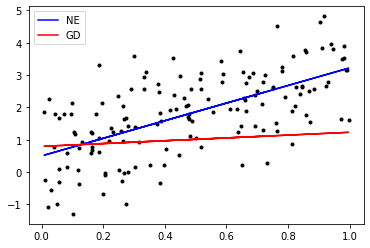

In [64]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()